<a href="https://colab.research.google.com/github/arara90/Python-Machine-learning/blob/master/%ED%95%98%EB%8A%98/190414/STUDY_190414_%EC%95%99%EC%83%81%EB%B8%94%ED%95%99%EC%8A%B5%26%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##앙상블학습
* 여러개의 모델을 학습시켜 그 모델들의 예측결과들을 이용해 하나의 모델보다 더 나은 값을 예측하는 방법
* 대표적인 예로는 랜덤 포레스트(Random Forest)가 있다. 랜덤포레스트는 여러개의 의사결정나무(decision tree)들을 생성한 다음, 각 개별 트리의 예측값들 중에서 가장 많은 선택을 받은 클래스(또는 label)로 예측하는 알고리즘

###1. 투표 기반 분류기(Voting Classifier)
* 투표 기반 분류기는 아래의 그림에서 볼 수 있듯이, 학습 단계에서 **여러개의 머신러닝 알고리즘 모델을 학습**시킨 후 이러한 모델들을 이용해 새로운 데이터에 대해 각 모델의 예측값을 가지고 **다수결 투표**를 통해 최종 클래스를 예측하는 방법을 말한다. 이러한 분류기를 **직접 투표(hard voting) 분류기**라고 한다.
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F9954013B5B836E9822BE3E)

* 이러한 다수결 투표 분류기가 앙상블에 포함된 개별 분류기(위의 그림에서는 LR, RF, SVM, ...) 중 가장 성능이 좋은 분류기 보다 정확도가 더 높을 경우가 많다

* 투표 분류기가 더 좋은 이유

  예를 들어 앞면이 나올 확률이 51%이고, 뒷면이 나올 확률이 49%인 동전 던지기를 한다고 가정하자. 이러한 동전을 1,000번 던지면 약 510번은 앞면, 490번은 뒷면이 나오게 될것이다. 따라서 더 많은 횟수로 앞면이 나온다는 것을 알 수 있다. 이를 수학적으로 계산해보면 1,000번을 던진 후 앞면이 더 많이 나올 확률은 75%에 가까운 것을 알 수 있다.
 
 이를 SciPy를 이용해 1-scipy.stats.binom.cdf(499, 1000, 0.51) 구할 수 있다. 또한, 동전을 10,000번 던진다면 앞면이 더 많이 나올 확률이 97%(1 - scipy.stats.binom.cdf(4999, 10000, 0.51)) 이상으로 올라간다. 

* 이와 비슷하게 51% 정확도를 가진 1,000개의 분류기로 앙상블 모델을 구축할 경우 정확도는 75%로 기대할 수 있다. 그러나 이러한 가정은 모든 분류기가 독립적이어야 하고, 오차에 대해 상관관계가 없어야 한다. 따라서, 앙상블 기법에서 독립적인 모델을 만들어 주기 위해서는 **다른 머신러닝 알고리즘으로 학습시키는 것이 좋다**. 그 이유는 모델 별로 다른 종류의 오차를 가지므로 상관관계가 적어지기 때문이다.

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99DC98395B836EB318E426)

###moons 데이터셋에 앙상블 학습 적용하기

위에서 살펴본 투표 분류기를 Scikit-Learn의 VotingClassifier를 이용해 예제 데이터셋인 moons데이터 셋에 적용해보자. moons 데이터셋은 Scikit-Learn에서 제공하는 반달 모양의 데이터셋이다.


In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Hard voting

VotingClassifier에서 voting='hard' 인 경우 각 분류기의 예측값(레이블)을 가지고 **다수결 투표**를 통해 최종 앙상블 예측이 이루어진다.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

Accuracy_hard voting

In [53]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.848
RandomForestClassifier 0.952
SVC 0.904
VotingClassifier 0.928


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


###Soft voting

VotingClassifier에서 voting='soft' 인 경우 각 분류기의 예측값(레이블)의 확률을 가지고 평균을 구한 뒤, **평균이 가장 높은 클래스로 최종 앙상블 예측**이 이루어진다. 이러한 방법을 간접 투표(soft voting)이라 한다.

In [39]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

Accuravy_soft voting

In [40]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: Fu

###2. 배깅과 페이스팅 (Bagging and Pasting)
* '투표기반 분류기'에서는 여러개의 머신러닝 알고리즘을 이용해 분류기를 만들어 앙상블 학습을 했다. 이번에 알아볼 또 다른 방법으로는 **하나의 알고리즘을 사용**하지만 학습 **데이터셋을 랜덤하게 추출**하여 모델(분류기)을 각각 다르게 학습시키는 방법이다. 

* 이렇게, 학습 데이터셋에서 랜덤하게 추출할 때, **중복을 허용**하는 방식을** 배깅(bagging)**이라고 한다. 배깅(bagging)은 bootstrap aggregating의 줄임말이며 통계학에서는 중복을 허용한 리샘플링(resampling)을 부트스트래핑(bootstraping)이라고 한다. 
* 이와 반대로 **중복을 허용하지 않는** 샘플링 방식을 **페이스팅(pasting)**이라고 한다.
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F9940D7375B836ECA010A55)

* 위의 그림에서 각 모델이 학습된 후에 새로운 데이터에 대해서는 '투표기반 분류기'와 동일하게 분류(classification)일 때는 **최빈값(mode)** 즉, **가장 많은 예측 클래스로 앙상블이 예측**하며, 회귀(regression)일 경우에는 각 분류기의 예측값의 평균을 계산하여 평균값을 예측값으로 한다.

* 각 모델은 전체 학습 데이터셋으로 학습시킨 것보다 편향되어 있지만, 앙상블을 통해 편향(bias)과 분산(variance)이 감소한다. 일반적으로 앙상블 학습은 전체 학습 데이터셋을 이용해 하나의 모델을 학습시킬 때와 비교해서 편향은 비슷하지만 분산은 줄어든다.

### 2.1 사이킷런의 배깅과 페이스팅
Scikit-Learn은 배깅과 페이스팅을 간편하게 사용할 수 있도록 **분류일 경우에는 BaggingClassifier**를, **회귀일 경우 BaggingRegressor**를 제공한다. 

'투표기반 분류기'에서 다룬 moons 데이터셋을 BaggingClassifier를 이용해 500개의 의사결정나무(decision tree)모델을 만들어 배깅을 적용한 앙상블 학습을 해보자.

In [0]:
# data load

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###단 하나의 Decision Tree를 사용할 경우
배깅을 이용한 앙상블 학습이 얼마나 더 성능이 좋은지 비교하기 위해, 단 하나의 의사결정나무 모델을 이용해 moons 데이터셋에 적용해 보자.

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.856


### Bagging을 이용한 앙상블 학습
이번에는 BaggingClassifier를 이용해 500개의 의사결정나무 모델을 만들어 보자. BaggingClassifier는 사용하는 알고리즘 모델(분류기)가 각 예측 클래스의 확률을 추정할 수 있으면, 직접 투표(hard voting)대신 간접 투표(soft voting) 방식을 사용한다.

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.904


###하나의 의사결정나무에 대한 결정 경계(decision boundary)와 배깅을 이용한 앙상블 트리에 대한 결정 경계를 비교

앙상블 학습이 일반화(generalization)이 더 잘 된것을 알 수 있다.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

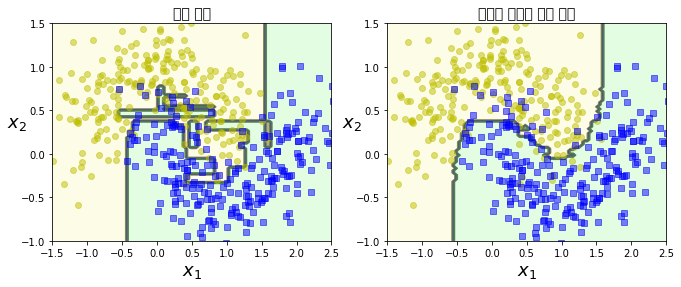

In [45]:
# graph 출력

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리", fontsize=14)
plt.show()

### 2.2 OOB(Out-of-Bag) 평가
* **배깅은 중복을 허용**하는 리샘플링(resampling) 즉, 부트스트래핑(bootstraping) 방식이기 때문에 전체 학습 데이터셋에서 어떠한 데이터 샘플은 여러번 샘플링 되고, 또 어떠한 샘플은 전혀 샘플링 되지 않을 수가 있다. 평균적으로 학습 단계에서 전체 학습 데이터셋 중 63% 정도만 샘플링 되며, **샘플링 되지 않은 나머지 37% 데이터 샘플들을 oob(out-of-bag) 샘플**이라고 한다.

* 앙상블(배깅) 모델의 학습 단계에서는 oob 샘플이 사용되지 않기 때문에, 이러한 **oob 샘플을 검증셋(validation set)이나 교차검증(cross validation)에 사용**할 수 있다. 

* Scikit-Learn에서는 BaggingClassifier의 인자인** oob_score=True로 설정하면 학습이 끝난 후 자동으로 oob 평가**를 할 수 있다. 

2.1 에서 moons 데이터셋을 BaggingClassifier를 적용한 후 oob 평가를 해보자

In [46]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

print('oob score :', bag_clf.oob_score_)

oob score : 0.9013333333333333


oob 샘플에 대한 결정 함수(decision function) 값 확인
  * 결정함수: 각 샘플에 대한 점수 계산

In [47]:
bag_clf.oob_decision_function_[:5]

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

### 3. Random Patches & Random Subspace
* BaggingClassifier는 특성(feature) 샘플링 또한 max_features와 bootstrap_features 두 개의 인자를 통해 제공한다. 위의 두 인자를 이용해 각 모델은 랜덤하게 선택한 특성(feature)으로 학습하게 된다.

* 이러한 방법은 데이터의 특성이 많은 고차원의 데이터셋을 다룰 때 적절하다. 학습 데이터 셋의 특성 및 샘플링(bootstraping) 사용 유무에 따라 두 종류로 나눌 수 있다.

  * Random Patches method : 특성 및 데이터 셋 샘플링(bootstraping) 모두 사용하는 방식 

  * Random Subspace method : 특성만 샘플링하는 방식

   bootstrap=False 이고, bootstrap_features=True

* 이러한 특성 샘플링은 더 다양한 모델을 만들며 편향은 늘어나지만 분산을 낮출 수 있다.

### 4. 랜덤 포레스트 (Random Forest)
* 랜덤 포레스트(Random Forest)는 **배깅(bagging)을 적용한 의사결정나무(decision tree)의 앙상블**이다. 2.1의 예제에서는 BaggingClassifier에 DecisionTreeClassifier를 인자로 넣어 줬었다. 
* Scikit-Learn에서는 랜덤 포레스트를 간편하게 쓸 수 있도록 **RandomForestClassifier**를 제공 한다.

 2.1의 예제를 RandomForestClassifier 를 이용해 모델링하고, 2.1의 방식과 비교해보자.
 

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

# BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# 두 모델의 예측 비교
print(np.sum(y_pred == y_pred_rf) / len(y_pred))

0.976


### 4.1 엑스트라 트리 (Extremely Randomized Trees)
* 랜덤 포레스트는 트리를 생성할 때, **각 노드는 랜덤하게 특성(feature)의 서브셋(자식 노드를)을 만들어 분할**한다. 반면 익스트림 랜덤 트리(Extremely Randomized Trees) 또는 **엑스트라 트리(Extra-Trees)**는 **트리를 더욱 랜덤하게 생성**하기 위해 노드를 분할하는 최적의 임계값을 찾는 것이 아니라 후보 특성을 이용해 랜덤하게 분할한 다음 그 중에서 최상의 분할을 선택하는 방법이다. 랜덤 포레스트 처럼 각 노드의 특성마다 최적의 임계값을 찾는것이 아니기 때문에 엑스트라 트리가 **훨씬 학습 속도가 빠르다.**

* Scikit-Learn에서는 ExtraTreesClassifier을 이용해 엑스트라 트리를 구현할 수 있다. 

랜덤포레스트와 엑스트라 트리를 비교해보자.


In [49]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_clf.fit(X_train, y_train)
y_pred_ext = extra_clf.predict(X_test)

# 두 모델의 예측 비교
print(np.sum(y_pred_rf == y_pred_ext) / len(y_pred_rf))

0.968


### 4.2 특성 중요도 (Feature Importance)
* **랜덤 포레스트의 장점**은 **특성(feature)의 상대적인 중요도를 측정하기 쉽다**는 것이다. Scikit-Learn에서는 어떠한 특성을 사용한 노드가 불순도(impurity)를 얼마나 감소시키는지를 계산하여 각 특성마다 상대적 중요도를 측정한다.

* Scikit-Learn의 RandomForestClassifier에서** feature_importances_ 변수**를 통해 해당 특성의 중요도를 확인할 수 있다. 

붗꽃(iris) 데이터셋을 RandomForestClassifier를 이용해 학습시키고 각 특성의 중요도를 출력해보자.


In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


### 5. 부스팅 (boosting)
부스팅(boosting)은 **성능이 약한 학습기(weak learner)를 여러 개 연결**하여 **강한 학습기(strong learner)를 만드는 앙상블 학습**이다. 부스팅 방법의 아이디어는 앞에서 학습된 모델을 보완해나가면서 더나은 모델로 학습시키는 것이다. 부스팅 방법에는 여러 종류가 있는데, 그 중 가장 유명하고 인기 있는 모델은 **아다부스트(AdaBoost, Adaptive Boosting)**와 **그래디언트 부스팅(Gradient Boosting)** 두 가지가 있다.

### 5.1 아다부스트 (AdaBoost)
아다부스트(AdaBoost)는 **과소적합(underfitted)됐던 학습 데이터 샘플의 가중치를 높이면서** 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합되도록 하는 방식이다. 아래의 그림에서 처럼 아다부스트의 단계를 설명하면 다음과 같다.

  1. 먼저 전제 학습 데이터셋을 이용해 모델을 만든 후, 잘못 예측(분류)된 샘플의 가중치를 상대적으로 높여준다. 

  2. 그 다음 두 번째 모델을 학습 시킬때 이렇게 업데이트된 가중치를 반영하여 모델을 학습 시킨다. 

  3. 이와 같은 과정을 반복한다.
  
  ![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F996E3A355B836F8019CC58)

### moons 데이터셋에 AdaBoost 적용하기
Scikit-Learn에는 AdaBoost를 사용할 수 있도록 **AdaBoostClassifier를 제공**한다. 

아래의 예제는 moons데이터셋에 AdaBoostClassifier 모델을 학습시킨 것이다. 

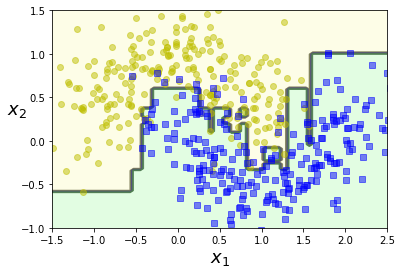

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
   DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X, y)

### 5.2 그래디언트 부스팅
그래디언트 부스팅은 **전의 학습된 모델의 오차를 보완하는 방향으로 모델(분류기, 학습기)을 추가**해주는 방법은 동일하다. 하지만, 그래디언트 부스팅은 아다부스트 처럼 학습단계 마다 데이터 샘플의 가중치를 업데이트 해주는 것이 아니라 학습 전단계 모델에서의 **잔여 오차(residual error)에 대해 새로운 모델을 학습시키는 방법**이다. 

  * 잔여오차(잔차): 관측값과 계산값의 차
  
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99AE553A5B8370021ECADB)

### 조기종료(early stopping)을 이용한 그래디언트 부스팅
그래디언트 부스팅의 학습 단계에서 학습 시킬 **최적의 트리(모델)의 개수를 찾기** 위해 조기 종료(early stopping)을 사용할 수 있다. 

GBRT를 학습시킨 후 staged_predict() 메소드를 이용해 각 모델의 예측값(y_pred)과 실제값(y_val)의 MSE를 구한 뒤 MSE가장 낮은 최적의 트리의 개수를 찾아 다시 최적의 트리 개수(best_n_estimator)로 그래디언트 부스팅을 학습시켜보자.(MSE: 평균 제곱근 편차)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# 최적의 트리 개수 찾기
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

# 최적의 트리개수로 그래디언트 부스팅 학습
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=104, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile24.uf.tistory.com%2Fimage%2F995370445B837061189DE4)

### 6 스태킹 (Stacking)
스태킹(stacking, stacked generalization의 줄임)은 '투표 기반 분류기'에서 처럼 'hard voting', 'soft voting' 방법이 아니라 **앙상블 학습에서 각 모델의 예측값을 가지고 새로운 메타 모델(meta learner)을 학습시켜 최종 예측 모델을 만드는 방법**을 말한다.

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile24.uf.tistory.com%2Fimage%2F998CF9435B83707B2EA1B3)

* 스태킹(stacking)의 과정은 다음과 같다.

  1. 학습 데이터셋에서 샘플링을 통해 서브셋1(subset-1)을 만들고, 이 서브셋을 이용해 각 모델을 학습시킨다. 

  2. 서브셋2(subset-2) 학습 시킨 모델을 이용해 각 모델의 예측값을 출력하고 예측값들을 합친다.

  3. 합쳐진 예측값들을 입력 특성(input feature)로 사용하는 새로운 모델(meta learner, blender)을 학습시킨다.